# <span style="color:#2834d4">Îß§Í∞úÎ≥ÄÏàò Í∞±Ïã†</span>

ÏµúÏ†ÅÌôî(optimization): ÏÜêÏã§Ìï®ÏàòÏùò Í∞íÏùÑ Í∞ÄÎä•Ìïú ÎÇÆÏ∂îÎäî Îß§Í∞úÎ≥ÄÏàòÎ•º Ï∞æÎäî Í≤É, Ï¶â Îß§Í∞úÎ≥ÄÏàòÏùò ÏµúÏ†ÅÍ∞íÏùÑ Ï∞æÎäî Î¨∏Ï†úÎ•º Ìë∏Îäî Í≤É

## 1. ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï (SGD)

### $\mathbf{W} \gets \mathbf{W} - \eta \frac{\partial L}{\partial \mathbf{W}}$

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

ÏÇ¨Ïö©Î∞©Î≤ï - ÏàòÎèÑÏΩîÎìú
```
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # ÎØ∏ÎãàÎ∞∞Ïπò
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...
```

## 2. Î™®Î©òÌÖÄ (Momentum)

### $\mathbf{v} \gets \alpha \mathbf{v} - \eta \frac{\partial L}{\partial \mathbf{W}}$
### $\mathbf{W} \gets \mathbf{W} + \mathbf{v}$

$\mathbf{v}$ : velocity

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

## 3. AdaGrad

learning rate decay (ÌïôÏäµÎ•† Í∞êÏÜå)
- ÌïôÏäµÎ•†ÏùÑ Ï†êÏ∞® Ï§ÑÏó¨Í∞ÄÎäî Î∞©Î≤ïÏúºÎ°ú, Ï≤òÏùåÏóêÎäî ÌÅ¨Í≤å ÌïôÏäµÌïòÎã§ Ï°∞Í∏àÏî© ÏûëÍ≤å ÌïôÏäµÌïòÎäî Í≤É.
- learning rate Í∞íÏù¥ ÎÑàÎ¨¥ ÏûëÏúºÎ©¥ ÌïôÏäµÏãúÍ∞ÑÏù¥ Í∏∏Ïñ¥ÏßÄÍ≥†, ÎÑàÎ¨¥ ÌÅ¨Î©¥ Î∞úÏÇ∞ÌïòÏó¨ ÌïôÏäµÏù¥ Ï†úÎåÄÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÏùå.

Adagrad : Í∞úÎ≥Ñ Îß§Í∞úÎ≥ÄÏàòÏóê Ï†ÅÏùëÏ†ÅÏúºÎ°ú (adaptive) ÌïôÏäµÎ•†ÏùÑ Ï°∞Ï†ïÌïòÎ©¥ÏÑú ÌïôÏäµ ÏßÑÌñâ
- Í≥ºÍ±∞Ïùò Í∏∞Ïö∏Í∏∞Î•º Ï†úÍ≥±ÌïòÏó¨ Í≥ÑÏÜç ÎçîÌï¥Í∞ÄÎ©¥ÏÑú ÌïôÏäµÏùÑ ÏßÑÌñâÌï†ÏàòÎ°ù Í∞±Ïã† Í∞ïÎèÑÍ∞Ä ÏïΩÌï¥Ïßê.

### $\mathbf{h} \gets \mathbf{h} + \frac{\partial L}{\partial \mathbf{W}} \odot \frac{\partial L}{\partial \mathbf{W}}$
### $\mathbf{W} \gets \mathbf{W} - \eta \frac{1}{\sqrt{\mathbf{h}}} \frac{\partial L}{\partial \mathbf{W}}$

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## 4. RMSProp

Í≥ºÍ±∞Ïùò Î™®Îì† Í∏∞Ïö∏Í∏∞Î•º Í∑†ÏùºÌïòÍ≤å ÎçîÌï¥Í∞ÄÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº, Î®º Í≥ºÍ±∞Ïùò Í∏∞Ïö∏Í∏∞Îäî ÏÑúÏÑúÌûà ÏûäÍ≥† ÏÉàÎ°úÏö¥ Í∏∞Ïö∏Í∏∞ Ï†ïÎ≥¥Î•º ÌÅ¨Í≤å Î∞òÏòÅÌïòÏó¨ Í≥ºÍ±∞ Í∏∞Ïö∏Í∏∞Ïùò Î∞òÏòÅ Í∑úÎ™®Î•º Í∏∞ÌïòÍ∏âÏàòÏ†ÅÏúºÎ°ú Í∞êÏÜåÏãúÌÇ¥
- AdaGradÎ°ú Î¨¥ÌïúÌûà Í≥ÑÏÜç ÌïôÏäµÌïúÎã§Î©¥ Ïñ¥Îäê ÏàúÍ∞Ñ Í∞±Ïã†ÎüâÏù¥ 0Ïù¥ ÎêòÏñ¥ Ï†ÑÌòÄ Í∞±Ïã†ÎêòÏßÄ ÏïäÎäî Î¨∏Ï†úÎ•º Í∞úÏÑ†Ìïú Í∏∞Î≤ï

### $\mathbf{h} \gets \rho \mathbf{h} + (1-\rho) \frac{\partial L}{\partial \mathbf{W}} \odot \frac{\partial L}{\partial \mathbf{W}}$
### $\mathbf{W} \gets \mathbf{W} - \eta \frac{1}{\sqrt{\mathbf{h}}} \frac{\partial L}{\partial \mathbf{W}}$

In [4]:
class RMSprop:
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## 5. Adam

momentum + RMSProp

### $\mathbf{m} \gets \beta_1 \mathbf{m} + (1-\beta_1)\frac{\partial L}{\partial \mathbf{W}}$
### $\mathbf{v} \gets \beta_2 \mathbf{v} + (1-\beta_2)\frac{\partial L}{\partial \mathbf{W}} \odot \frac{\partial L}{\partial \mathbf{W}}$
### $\hat{\mathbf{m}} \gets \frac{m}{(1-\beta_1^t)}, \hat{\mathbf{v}} \gets \frac{v}{(1-\beta_2^t)}$
### $\mathbf{W} \gets \mathbf{W} - \eta \frac{\hat{\mathbf{m}}}{\sqrt{\hat{\mathbf{v}}}}$

In [5]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.t = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.t += 1
        
        for key in params.keys():
            self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]  # ÏùºÏ∞® Î™®Î©òÌÖÄ
            self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)  # Ïù¥Ï∞® Î™®Î©òÌÖÄ
            m_unbias = self.m[key] / (1.0 - self.beta1**self.t)  # bias correction
            v_unbias = self.v[key] / (1.0 - self.beta2**self.t)  # bias correcion
            params[key] -= self.lr *  m_unbias / (np.sqrt(v_unbias) + 1e-7)

## 6. Í∞±Ïã† Î∞©Î≤ï ÎπÑÍµê

<img src="img/compare_optimizer1.png">

**MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î≥∏ Í∞±Ïã† Î∞©Î≤ï ÎπÑÍµê**

<img src="img/compare_optimizer2.png" align='left' width="30%" height="30%">

|iteration|SGD|Momentum|AdaGrad|Adam|
|:---:|:---:|:---:|:---:|:---:|
|0|2.311864598015662|2.385649391761|2.1177254991191226|2.1398345892056962|
|400|0.397280701092698|0.12505988816582034|0.0494271112834781|0.0792357420915904|
|900|0.22393582337790538|0.11924298272985065|0.02922040503059991|0.07950928723895823|
|1400|0.1469758364578464|0.0855866555229981|0.03847798248486493|0.04701864922897751|
|1900|0.25185541115620247|0.034430270259498776|0.016049158619572533|0.01428691276185064|

# <span style="color:#2834d4">Í∞ÄÏ§ëÏπòÏùò Ï¥àÍπÉÍ∞í</span>

Í∞ÄÏ§ëÏπò Í∞êÏÜå(weight decay): Í∞ÄÏ§ëÏπò Îß§Í∞úÎ≥ÄÏàòÏùò Í∞íÏù¥ ÏûëÏïÑÏßÄÎèÑÎ°ù ÌïôÏäµÌïòÎäî Î∞©Î≤ï
- Í∞ÄÏ§ëÏπò Í∞íÏùÑ ÏûëÍ≤åÌïòÏó¨ overfitting Î∞©ÏßÄ

## 1. Ï¥àÍπÉÍ∞íÏùÑ 0ÏúºÎ°ú ÌïòÎ©¥? (= Í∑†ÏùºÌïú Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥?)

- ÎèôÏùºÌïú layerÏùò Î™®Îì† Îâ¥Îü∞Ïóê Í∞ôÏùÄ Í∞íÏù¥ ÏûÖÎ†•ÎêòÍ≥† Ïó≠Ï†ÑÌååÏóêÏÑúÎèÑ Í∞ÄÏ§ëÏπòÍ∞Ä Î™®Îëê ÎòëÍ∞ôÏù¥ Í∞±Ïã†ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê, Í∞ÄÏ§ëÏπòÎ•º Ïó¨Îü¨ Í∞ú Í∞ñÎäî ÏùòÎØ∏Î•º ÏÇ¨ÎùºÏßÄÍ≤å Ìï®

## 2. ÏùÄÎãâÏ∏µÏùò ÌôúÏÑ±ÌôîÍ∞í Î∂ÑÌè¨ - sigmoid ÏÇ¨Ïö©ÌñàÏùÑ Îïå

- ÌôúÏÑ±ÌôîÍ∞í: ÌôúÏÑ±Ìôî Ìï®ÏàòÏùò Ï∂úÎ†• Îç∞Ïù¥ÌÑ∞

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def activation_value_dist(func, n):
    x = np.random.randn(1000, 100)  # 1000Í∞úÏùò Îç∞Ïù¥ÌÑ∞
    node_num = 100  # Í∞Å ÏùÄÎãâÏ∏µÏùò ÎÖ∏Îìú(Îâ¥Îü∞) Ïàò
    hidden_layer_size = 5  # ÏùÄÎãâÏ∏µÏù¥ 5Í∞ú
    activations = {}  # Ïù¥Í≥≥Ïóê ÌôúÏÑ±Ìôî Í≤∞Í≥º(ÌôúÏÑ±ÌôîÍ∞í)Î•º Ï†ÄÏû•
   
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]
        w = np.random.randn(node_num, node_num) * n
        a = np.dot(x, w)
        z = func(a)
        activations[i] = z
        
    plt.figure(figsize=(15,4))
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1)+"-layer")
        plt.hist(a.flatten(), 30, range=(0,1)) 
    plt.show()

In [7]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

### ÌëúÏ§ÄÌé∏Ï∞®Î•º 1Î°ú ÏÑ§Ï†ï
- Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ (gradient vanishing) Î∞úÏÉù
    - ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏùò Í≤ΩÏö∞ Ï∂úÎ†•Ïù¥ 0ÎòêÎäî 1Ïóê Í∞ÄÍπåÏõåÏßÄÎ©¥ Í∑∏ ÎØ∏Î∂ÑÏùÄ 0Ïóê Îã§Í∞ÄÍ∞ÄÏÑú Ïó≠Ï†ÑÌååÏùò Í∏∞Ïö∏Í∏∞ Í∞íÏù¥ Ï†êÏ†ê ÏûëÏïÑÏßÄÎã§ ÏÇ¨ÎùºÏßê

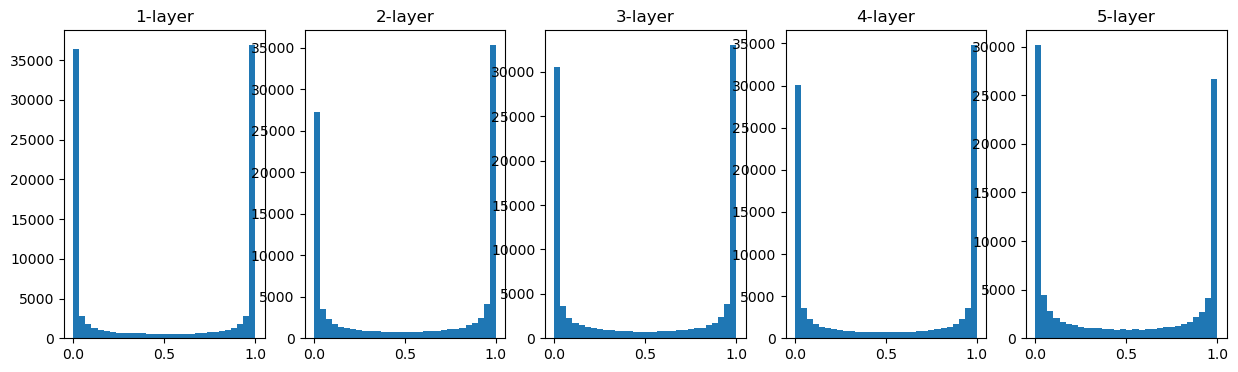

In [8]:
activation_value_dist(sigmoid, 1)

### ÌëúÏ§ÄÌé∏Ï∞®Î•º 0.01Î°ú ÏÑ§Ï†ï
- ÌôúÏÑ±ÌôîÍ∞íÏù¥ 0.5Î∂ÄÍ∑ºÏóê ÏßëÏ§ëÎêòÏñ¥ Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌïòÏßÄ ÏïäÏùå
- Í∑∏Îü¨ÎÇò ÌôúÏÑ±ÌôîÍ∞íÎì§Ïù¥ ÏπòÏö∞ÏπòÎ©¥ ÌëúÌòÑÎ†•ÏùÑ Ï†úÌïúÌïúÎã§Îäî Í¥ÄÏ†êÏóêÏÑú Î¨∏Ï†úÍ∞Ä Îê®
    - Îã§ÏàòÏùò Îâ¥Îü∞Ïù¥ Í±∞Ïùò Í∞ôÏùÄ Í∞íÏùÑ Ï∂úÎ†•ÌïòÍ≥† ÏûàÏñ¥ Îâ¥Îü∞ÏùÑ Ïó¨Îü¨ Í∞ú Îëî ÏùòÎØ∏Í∞Ä ÏóÜÏñ¥Ïßê

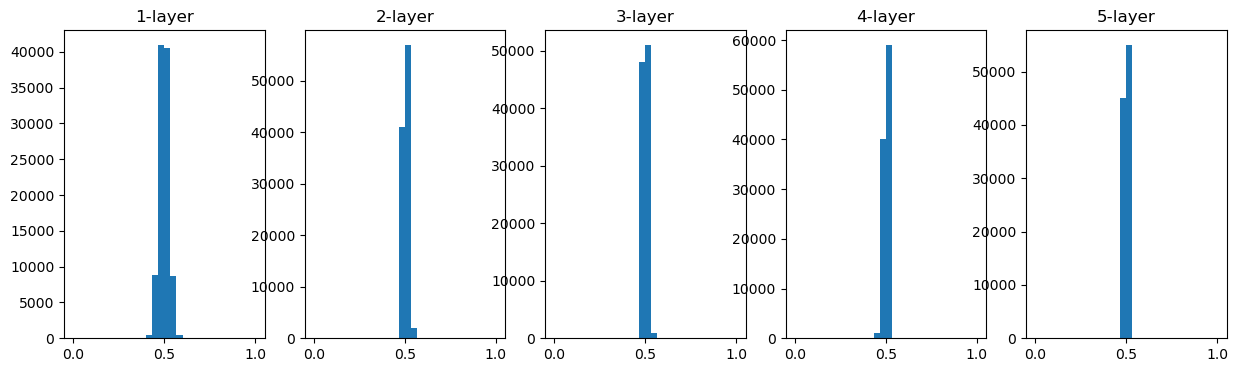

In [9]:
activation_value_dist(sigmoid, 0.01)

### Xavier initalization
- Ïïû Í≥ÑÏ∏µÏùò ÎÖ∏ÎìúÍ∞Ä nÍ∞úÎùºÎ©¥, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä $\frac{1}{\sqrt{n}}$Ïù∏ Î∂ÑÌè¨Î•º ÏÇ¨Ïö©
- Ï∏µÏù¥ ÍπäÏñ¥Ïßà ÏàòÎ°ù ÌòïÌÉúÍ∞Ä Îã§ÏÜå ÏùºÍ∑∏Îü¨ÏßÄÏßÄÎßå ÏïûÏóêÏÑú Î≥∏ Î∞©ÏãùÎ≥¥Îã§ ÎÑìÍ≤å Î∂ÑÌè¨Îê®ÏùÑ Ïïå Ïàò ÏûàÏùå

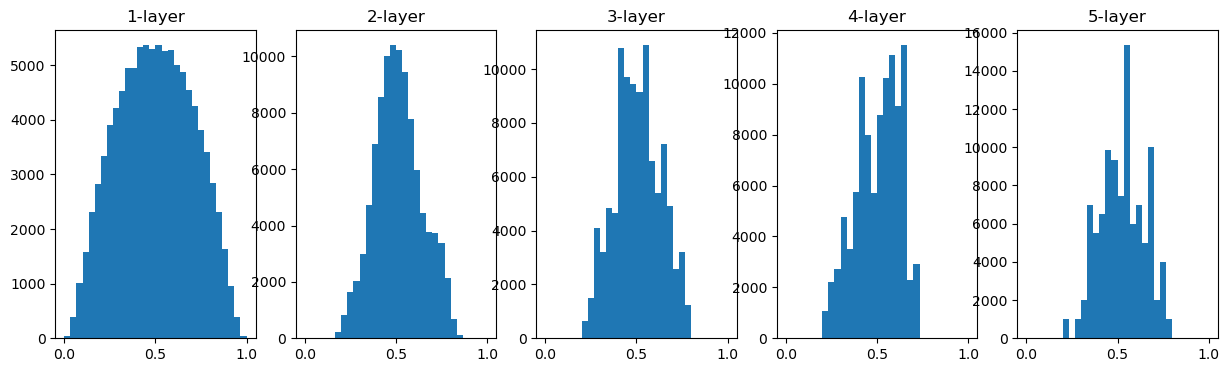

In [10]:
node_num = 100
activation_value_dist(sigmoid, np.sqrt(1.0 / node_num))

## 3. ReLUÎ•º ÏÇ¨Ïö©Ìï† ÎïåÏùò Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Í∞í

In [11]:
def ReLU(x):
    return np.maximum(0, x)

### ÌëúÏ§ÄÌé∏Ï∞®Î•º 0.01Î°ú ÏÑ§Ï†ï
- Í∞Å Ï∏µÏùò ÌôúÏÑ±ÌôîÍ∞íÎì§ÏùÄ ÏïÑÏ£º ÏûëÏùÄ Í∞íÎì§Ïù¥Í≥† Ïù¥Îäî Ïó≠Ï†ÑÌååÎïå Í∞ÄÏ§ëÏπòÏùò Í∏∞Ïö∏Í∏∞ Ïó≠Ïãú ÏûëÏïÑÏßÑÎã§Îäî Îúª
- Ïã§Ï†úÎ°úÎèÑ ÌïôÏäµÏù¥ Í±∞Ïùò Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÏùÑ Í≤É

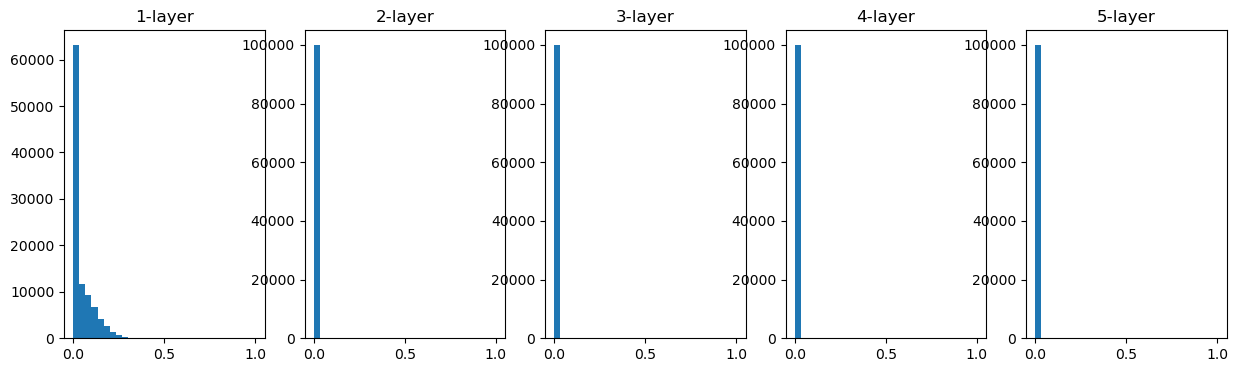

In [12]:
activation_value_dist(ReLU, 0.01)

### Xavier initalization
- Ï∏µÏù¥ ÍπäÏñ¥ÏßÄÎ©¥ÏÑú ÏπòÏö∞Ïπ®Ïù¥ Ï°∞Í∏àÏî© Ïª§Ïßê
- Ïã§Ï†úÎ°ú Ï∏µÏù¥ ÍπäÏñ¥ÏßÄÎ©¥ ÌôúÏÑ±ÌôîÍ∞íÎì§Ïùò ÏπòÏö∞Ïπ®ÎèÑ Ïª§ÏßÄÍ≥† ÌïôÏäµÌï† Îïå Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÎ•º ÏùºÏúºÌÇ¥

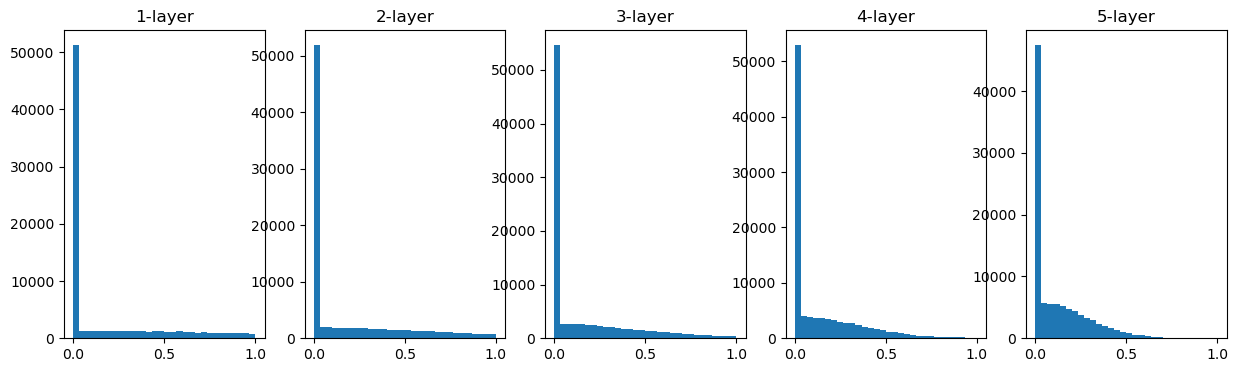

In [13]:
node_num = 100
activation_value_dist(ReLU, np.sqrt(1.0 / node_num))

### He initialization
- Ïïû Í≥ÑÏ∏µÏùò ÎÖ∏ÎìúÍ∞Ä nÍ∞úÎùºÎ©¥, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä $\frac{2}{\sqrt{n}}$Ïù∏ Î∂ÑÌè¨Î•º ÏÇ¨Ïö©
    - ReLUÎäî ÏùåÏùò ÏòÅÏó≠Ïù¥ 0Ïù¥ÎùºÏÑú Îçî ÎÑìÍ≤å Î∂ÑÌè¨ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ 2Î∞∞Ïùò Í≥ÑÏàòÍ∞Ä ÌïÑÏöîÌïòÎã§Í≥† ÏßÅÍ∞êÏ†ÅÏúºÎ°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÏùå
- Î™®Îì† Ï∏µÏóêÏÑú Í∑†ÏùºÌïòÍ≤å Î∂ÑÌè¨ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ïó≠Ï†ÑÌååÎïåÎèÑ Ï†ÅÏ†àÌïú Í∞íÏù¥ ÎÇòÏò¨ Í≤ÉÏúºÎ°ú Í∏∞ÎåÄÌï† Ïàò ÏûàÏùå

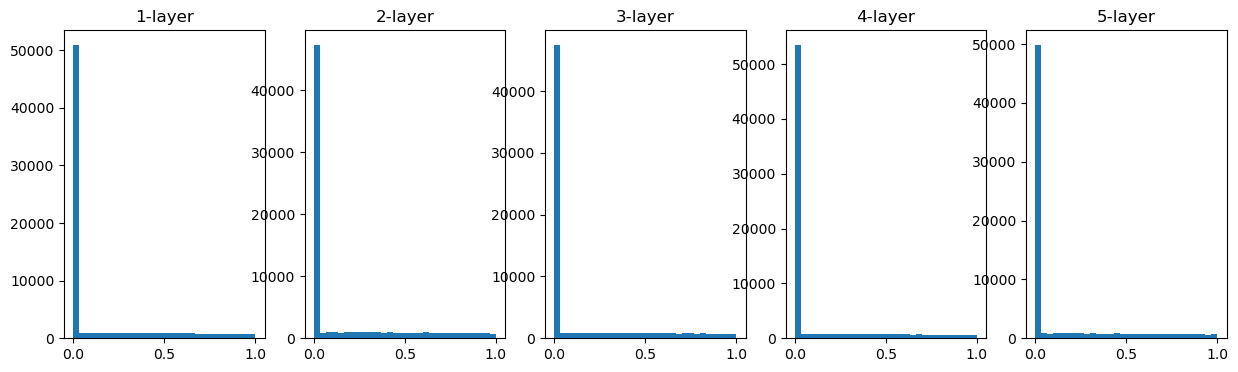

In [14]:
node_num = 100
activation_value_dist(ReLU, np.sqrt(2.0 / node_num))

## 4. MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î≥∏ Í∞ÄÏ§ëÏπò Ï¥àÍπÉÍ∞í ÎπÑÍµê

- Ï∏µÎ≥Ñ Îâ¥Îü∞ ÏàòÍ∞Ä 100Í∞úÏù∏ 5Ï∏µ Ïã†Í≤ΩÎßùÏóêÏÑú ReLU ÏÇ¨Ïö©

<img src="img/weight_init_compare.png" align='left' width="40%" height="40%">

|iteration|std=0.01|Xavier|He|
|:---:|:---:|:---:|:---:|
|0|2.302544725029941|2.3085964538202006|2.3380467942566465|
|400|2.303284375915534|1.4752362788755917|0.40676313851907686|
|900|2.3024281441488865|0.42736497442224114|0.2458057090695743|
|1400|2.302129356976167|0.4022931155339009|0.34895854989631847|
|1900|2.2979235879617343|0.3450216887304113|0.22400708029691246|

# <span style="color:#2834d4">Î∞∞Ïπò Ï†ïÍ∑úÌôî(Batch Normalization)</span>

## 1. Î∞∞Ïπò Ï†ïÍ∑úÌôî ÏïåÍ≥†Î¶¨Ï¶ò

<img src="img/batch_normalization.png">

Î∞∞Ïπò Ï†ïÍ∑úÌôî: Í∞Å Ï∏µÏóêÏÑúÏùò ÌôúÏÑ±ÌôîÍ∞íÏù¥ Ï†ÅÎãπÌûà Î∂ÑÌè¨ÎêòÎèÑÎ°ù Ï°∞Ï†ïÌïòÎäî Í≤ÉÏúºÎ°ú, ÌôúÏÑ±Ìôî Ìï®Ïàò ÏïûÏóê Ï†ÅÏö©Ìï®
- ÌïôÏäµÏãú ÎØ∏ÎãàÎ∞∞Ïπò Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Í∞Ä ÌèâÍ∑†Ïù¥ 0, Î∂ÑÏÇ∞Ïù¥ 1Ïù¥ ÎêòÎèÑÎ°ù Ï†ïÍ∑úÌôîÌï®
- Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞Ïóê Í≥†Ïú†Ìïú scale(ùõæ), shift(ùõΩ) Î≥ÄÌôò ÏàòÌñâ.
    - Ï≤òÏùåÏóêÎäî ùõæ=1, ùõΩ=0 Î∂ÄÌÑ∞ ÏãúÏûëÌïòÍ≥† ÌïôÏäµÌïòÎ©¥ÏÑú Ï†ÅÌï©Ìïú Í∞íÏúºÎ°ú Ï°∞Ï†ï

### $$\mu_B \gets \frac{1}{m} \sum_m^{i=1}x_i, \qquad \sigma_B^2 \gets \frac{1}{m} \sum_m^{i=1}(x_i-\mu_B)^2, \qquad \hat{x}_i \gets \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \varepsilon}} \qquad y_i \gets \gamma \hat{x}_i + \beta$$

Î∞∞Ïπò Ï†ïÍ∑úÌôîÍ∞Ä Ï£ºÎ™©Î∞õÎäî Ïù¥Ïú†
- ÌïôÏäµÏùÑ Îπ®Î¶¨ ÏßÑÌñâÌï† Ïàò ÏûàÏùå (ÌïôÏäµ ÏÜçÎèÑ Í∞úÏÑ†)
- Ï¥àÍπÉÍ∞íÏóê ÌÅ¨Í≤å ÏùòÏ°¥ÌïòÏßÄ ÏïäÏùå
- Ïò§Î≤ÑÌîºÌåÖ ÏñµÏ†ú (ÎìúÎ°≠ÏïÑÏõÉ Îì±Ïùò ÌïÑÏöîÏÑ± Í∞êÏÜå)
    


## 2. Î∞∞Ïπò Ï†ïÍ∑úÌôîÏùò Ìö®Í≥º

<img src="img/bn_test.png">

# <span style="color:#2834d4">Î∞îÎ•∏ ÌïôÏäµÏùÑ ÏúÑÌï¥</span>

## 1. Ïò§Î≤ÑÌîºÌåÖ(overfitting)

Ïò§Î≤ÑÌîºÌåÖ: Ïã†Í≤ΩÎßùÏù¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå ÏßÄÎÇòÏπòÍ≤å Ï†ÅÏùëÎêòÏñ¥ Í∑∏ Ïô∏Ïùò Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ï†úÎåÄÎ°ú ÎåÄÏùëÌïòÏßÄ Î™ªÌïòÎäî ÏÉÅÌÉú
- Ïò§Î≤ÑÌîºÌåÖÏù¥ Ï£ºÎ°ú ÏùºÏñ¥ÎÇòÎäî Í≤ΩÏö∞
    - Îß§Í∞úÎ≥ÄÏàòÍ∞Ä ÎßéÍ≥† ÌëúÌòÑÎ†•Ïù¥ ÎÜíÏùÄ Î™®Îç∏
    - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏùå

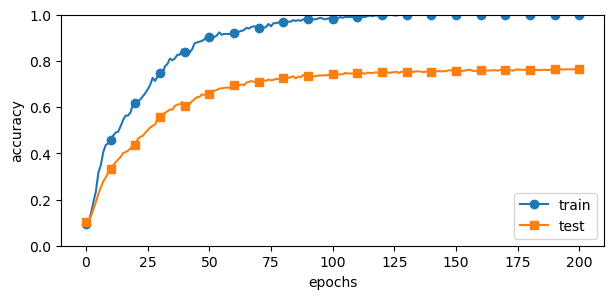

In [15]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# Ïò§Î≤ÑÌîºÌåÖ Ïû¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º Ï§ÑÏûÑ
x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_acc_list = []
test_acc_list = []
train_loss_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

plt.figure(figsize=(7, 3))
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 2. Í∞ÄÏ§ëÏπò Í∞êÏÜå (weight decay)

Í∞ÄÏ§ëÏπò Í∞êÏÜå: ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÌÅ∞ Í∞ÄÏ§ëÏπòÏóê ÎåÄÌï¥ÏÑúÎäî Í∑∏Ïóê ÏÉÅÏùëÌïòÎäî ÌÅ∞ ÌéòÎÑêÌã∞Î•º Î∂ÄÍ≥ºÌïòÏó¨ Ïò§Î≤ÑÌîºÌåÖÏùÑ ÏñµÏ†úÌïòÎäî Î∞©Î≤ï
- Î™®Îì† Í∞ÄÏ§ëÏπò Í∞ÅÍ∞ÅÏùò ÏÜêÏã§Ìï®ÏàòÏóê Ï†ïÍ∑úÌôîÌï≠Ïù∏ $\frac{1}{2}\lambda W^2$ÏùÑ ÎçîÌï®
    - ùúÜ: Ï†ïÍ∑úÌôî ÏÑ∏Í∏∞Î•º Ï°∞Ï†àÌïòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú, Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù Í∑úÏ†úÍ∞Ä Í∞ïÌï¥Ï†∏ underfiiting Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÍ≥†, Í∞íÏù¥ ÏûëÏïÑÏßàÏàòÎ°ù Í∑úÏ†úÍ∞Ä ÏïΩÌï¥Ï†∏ overfitting Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
- Í∞ÄÏ§ëÏπòÏùò Í∏∞Ïö∏Í∏∞Î•º Íµ¨ÌïòÎäî Í≥ÑÏÇ∞ÏóêÏÑúÎäî Í∑∏ÎèôÏïàÏùò Ïò§Ï∞®Ïó≠Ï†ÑÌååÎ≤ïÏóê Îî∞Î•∏ Í≤∞Í≥ºÏóê Ï†ïÍ∑úÌôî Ìï≠ÏùÑ ÎØ∏Î∂ÑÌïú $\lambda W$Î•º ÎçîÌï®


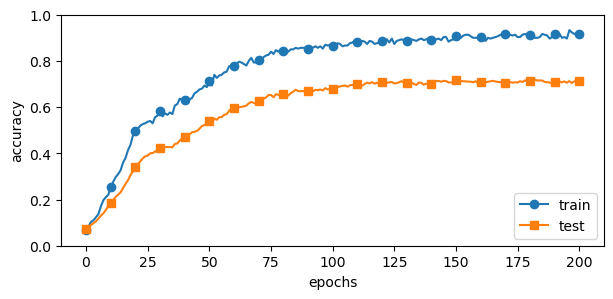

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# Ïò§Î≤ÑÌîºÌåÖÏùÑ Ïû¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º Ï§ÑÏûÑ
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay ÏÑ§Ï†ï 
weight_decay_lambda = 0.1
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

plt.figure(figsize=(7, 3))
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 3. ÎìúÎ°≠ÏïÑÏõÉ (dropout)

ÎìúÎ°≠ÏïÑÏõÉ: Îâ¥Îü∞ÏùÑ ÏûÑÏùòÎ°ú ÏÇ≠Ï†úÌïòÎ©¥ÏÑú ÌïôÏäµÌïòÎäî Î∞©Î≤ïÏúºÎ°ú, ÌõàÎ†® Îïå ÏùÄÎãâÏ∏µÏùò Îâ¥Îü∞ÏùÑ Î¨¥ÏûëÏúÑÎ°ú Í≥®Îùº ÏÇ≠Ï†ú
- train) Îç∞Ïù¥ÌÑ∞Î•º ÌùòÎ¶¥ ÎïåÎßàÎã§ ÏÇ≠Ï†úÌï† Îâ¥Îü∞ÏùÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉù
- test) Î™®Îì† Îâ¥Îü∞Ïóê Ïã†Ìò∏ Ï†ÑÎã¨. Îã®, Í∞Å Îâ¥Îü∞Ïùò Ï∂úÎ†•Ïóê train Îïå ÏÇ≠Ï†ú Ïïà Ìïú ÎπÑÏú®ÏùÑ Í≥±ÌïòÏó¨ Ï∂úÎ†•

<img src="img/dropout.png" width="50%" height="50%">

In [18]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

<img src="img/dropout_test.png" width="50%" height="50%" align='left'>

# <span style="color:#2834d4">Ï†ÅÏ†àÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞í Ï∞æÍ∏∞</span>

## 1. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ (validation data)

- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: Îß§Í∞úÎ≥ÄÏàò ÌïôÏäµ
- Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
    - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÎïåÎäî ÏãúÌóò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏïàÎê®
    - ÏãúÌóò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ïÌïòÎ©¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÏù¥ ÏãúÌóò Îç∞Ïù¥ÌÑ∞Ïóê Ïò§Î≤ÑÌîºÌåÖ ÎêòÏñ¥ Î≤îÏö© ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßà Ïàò ÏûàÏùå
- ÏãúÌóò Îç∞Ïù¥ÌÑ∞: Ïã†Í≤ΩÎßùÏùò Î≤îÏö© ÏÑ±Îä• ÌèâÍ∞Ä

## 2. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî

Ïã†Í≤ΩÎßùÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôîÏóêÏÑúÎäî grid search Í∞ôÏùÄ Í∑úÏπôÏ†Å ÌÉêÏÉâÎ≥¥Îã§ Î¨¥ÏûëÏúÑÎ°ú ÏÉòÌîåÎßÅÌï¥ ÌÉêÏÉâÌïòÎäî Ìé∏Ïù¥ Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÎÇ∏Îã§Í≥† ÏïåÎ†§Ï†∏ ÏûàÎäîÎç∞, Ïù¥Îäî ÏµúÏ¢Ö Ï†ïÌôïÎèÑÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Î†•Ïù¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎßàÎã§ Îã§Î•¥Í∏∞ ÎïåÎ¨∏

1. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÏùò Î≤îÏúÑ ÏÑ§Ï†ï - 0.001ÏóêÏÑú 1000 ÏÇ¨Ïù¥ ($10^{-3}$ ~ $10^3$)Í≥º Í∞ôÏù¥ 10Ïùò Í±∞Îì≠Ï†úÍ≥± Îã®ÏúÑÎ°ú Î≤îÏúÑÎ•º ÏßÄÏ†ï (Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú ÏßÄÏ†ï)
2. ÏÑ§Ï†ïÎêú Î≤îÏúÑÏóêÏÑú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞íÏùÑ Î¨¥ÏûëÏúÑÎ°ú Ï∂îÏ∂ú
3. ÏÉòÌîåÎßÅÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµÌïòÍ≥†, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Ï†ïÌôïÎèÑ ÌèâÍ∞Ä (Îã®, ÏóêÌè≠ÏùÄ ÏûëÍ≤å ÏÑ§Ï†ï)
4. 2ÏôÄ 3ÏùÑ ÌäπÏ†ïÌöüÏàò Î∞òÎ≥µÌïòÎ©∞ Ï†ïÌôïÎèÑÏùò Í≤∞Í≥ºÎ•º Î≥¥Í≥† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïùò Î≤îÏúÑÎ•º Ï¢ÅÌûò

## 3. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî Íµ¨ÌòÑÌïòÍ∏∞

ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î¨¥ÏûëÏúÑ Ï∂îÏ∂ú<br>
ex) Í∞ÄÏ§ëÏπò Í∞êÏÜå Í≥ÑÏàòÎ•º $10^{-8}$ ~ $10^{-4}$, ÌïôÏäµÎ•†ÏùÑ $10^{-6}$ ~ $10^{-2}$ Î≤îÏúÑÎ∂ÄÌÑ∞ ÏãúÏûë

val acc:0.11 | lr:1.0885677327377536e-05, weight decay:8.894365068383043e-06
val acc:0.15 | lr:9.716167635311816e-06, weight decay:1.7454108666744364e-07
val acc:0.13 | lr:1.7082625741197613e-05, weight decay:2.728514965702526e-07
val acc:0.53 | lr:0.0038098902439379543, weight decay:1.8011405690488207e-08
val acc:0.19 | lr:8.620048948107615e-05, weight decay:2.161233894767683e-08
val acc:0.11 | lr:1.7588208001821254e-05, weight decay:1.3726080128938528e-07
val acc:0.21 | lr:0.00016496275776056027, weight decay:3.479867348044775e-05
val acc:0.76 | lr:0.007070959598375459, weight decay:5.975087228367633e-07
val acc:0.16 | lr:7.416776515719739e-05, weight decay:6.210429432455929e-07
val acc:0.14 | lr:3.0690290854304406e-05, weight decay:1.317481812816872e-05
val acc:0.08 | lr:1.3211287710912335e-06, weight decay:3.052708971503375e-05
val acc:0.43 | lr:0.0038038146252859094, weight decay:1.7254346998059582e-06
val acc:0.3 | lr:0.0015453609784912012, weight decay:4.0230148624589556e-07
val

Best-11(val acc:0.72) | lr:0.00699306081441603, weight decay:6.886188584440441e-07
Best-12(val acc:0.62) | lr:0.005481973186282814, weight decay:1.2559697049448419e-06
Best-13(val acc:0.61) | lr:0.0035564591155625687, weight decay:1.2714260728497557e-07
Best-14(val acc:0.6) | lr:0.0036226428123951044, weight decay:2.8381483529048152e-05
Best-15(val acc:0.53) | lr:0.0038098902439379543, weight decay:1.8011405690488207e-08
Best-16(val acc:0.51) | lr:0.003053478218851446, weight decay:2.3616932918847347e-05
Best-17(val acc:0.45) | lr:0.005861571368559597, weight decay:4.549950188222071e-05
Best-18(val acc:0.43) | lr:0.0038038146252859094, weight decay:1.7254346998059582e-06
Best-19(val acc:0.34) | lr:0.0012206264125195583, weight decay:1.4445992597855248e-05
Best-20(val acc:0.33) | lr:0.0010561988686978115, weight decay:9.180160155628719e-08


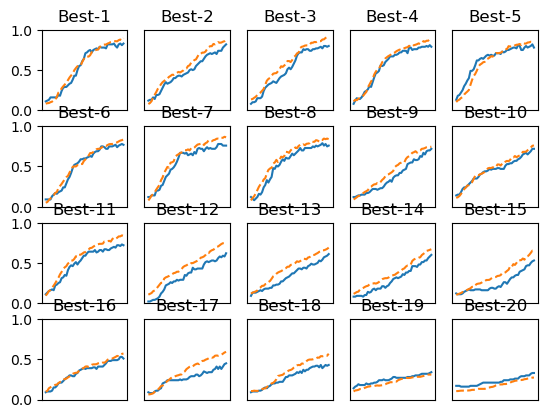

In [19]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:500]
t_train = t_train[:500]

validation_rate = 0.20  # 20%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÌï†
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val, epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

optimization_trial = 100
results_val = {}
results_train = {}

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î¨¥ÏûëÏúÑ ÌÉêÏÉâ
for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

# <span style="color:#2834d4">Ï†ïÎ¶¨</span>

- Îß§Í∞úÎ≥ÄÏàò Í∞±Ïã† Î∞©Î≤ïÏóêÎäî ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï(SGD) Ïô∏ÏóêÎèÑ Î™®Î©òÌÖÄ, AdaGrad, Adam Îì±Ïù¥ ÏûàÏùå.
- Í∞ÄÏ§ëÏπò Ï¥àÍπÉÍ∞íÏùÑ Ï†ïÌïòÎäî Î∞©Î≤ïÏùÄ Ïò¨Î∞îÎ•∏ ÌïôÏäµÏùÑ ÌïòÎäîÎç∞ Îß§Ïö∞ Ï§ëÏöîÌïòÍ≥†, 'Xavier Ï¥àÍπÉÍ∞í'Í≥º 'He Ï¥àÍπÉÍ∞í'Ïù¥ Ìö®Í≥ºÏ†Å.
- Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º Ïù¥Ïö©ÌïòÎ©¥ ÌïôÏäµÏùÑ Îπ†Î•¥Í≤å ÏßÑÌñâÌï† Ïàò ÏûàÍ≥†, Ï¥àÍπÉÍ∞íÏóê ÏòÅÌñ•ÏùÑ Îçú Î∞õÍ≤å Îê®.
- Ïò§Î≤ÑÌîºÌåÖÏùÑ ÏñµÏ†úÌïòÎäî Ï†ïÍ∑úÌôî Í∏∞Ïà†Î°úÎäî Í∞ÄÏ§ëÏπò Í∞êÏÜåÏôÄ ÎìúÎ°≠ÏïÑÏõÉÏù¥ ÏûàÏùå.
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞í ÌÉêÏÉâÏùÄ ÏµúÏ†Å Í∞íÏù¥ Ï°¥Ïû¨Ìï† Î≤ïÌïú Î≤îÏúÑÎ•º Ï†êÏ∞® Ï¢ÅÌûàÎ©¥ÏÑú ÌïòÎäî Í≤ÉÏù¥ Ìö®Í≥ºÏ†ÅÏûÑ.